# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

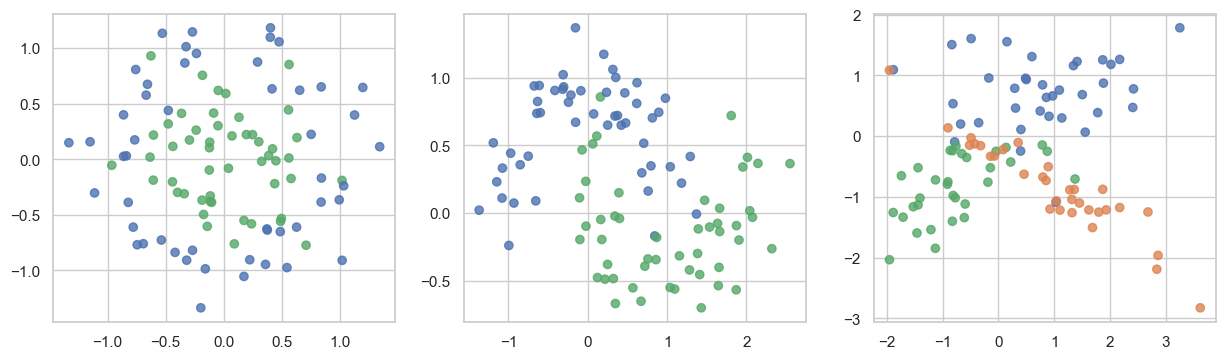

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y, name=""):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(name)
    plt.xlabel("1 feature")
    plt.ylabel("2 feature")
    plt.show()

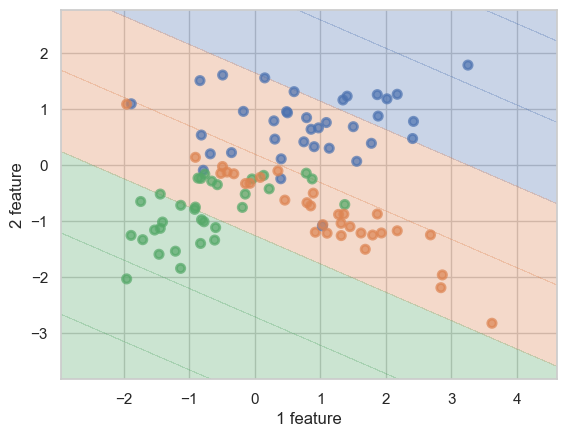

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [8]:
splits = []

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    splits.append((X_train, X_test, y_train, y_test))
    

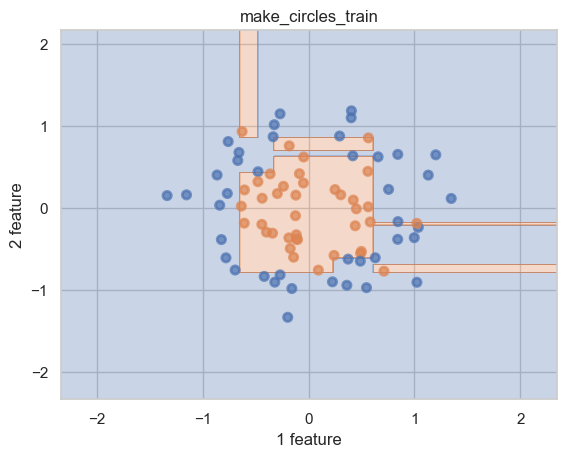

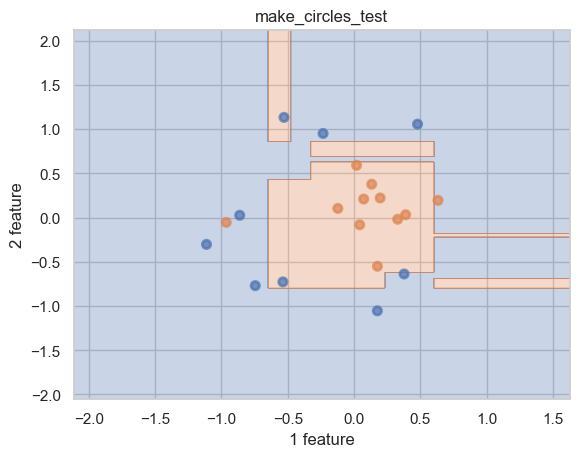

Train accuracy is 1.0
Test accuracy is 0.8


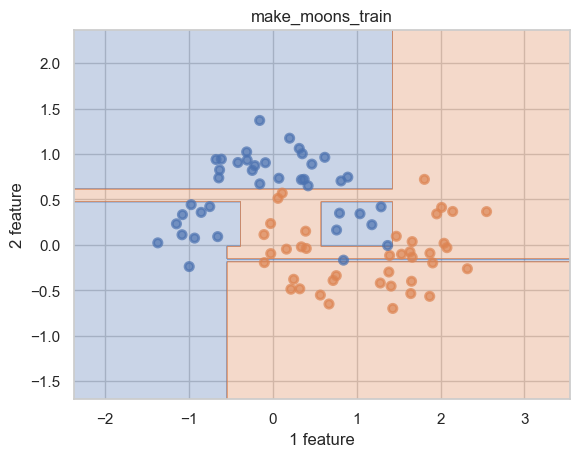

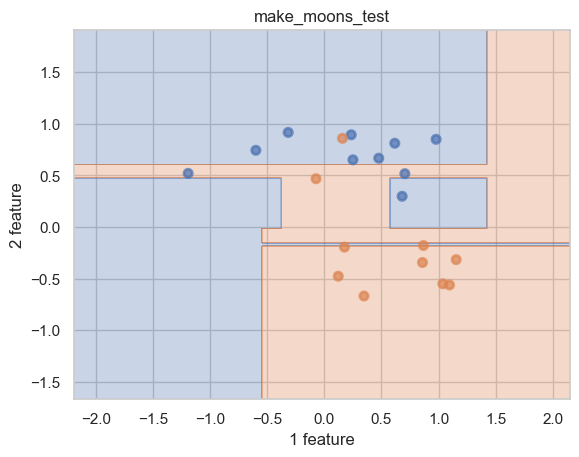

Train accuracy is 1.0
Test accuracy is 0.8


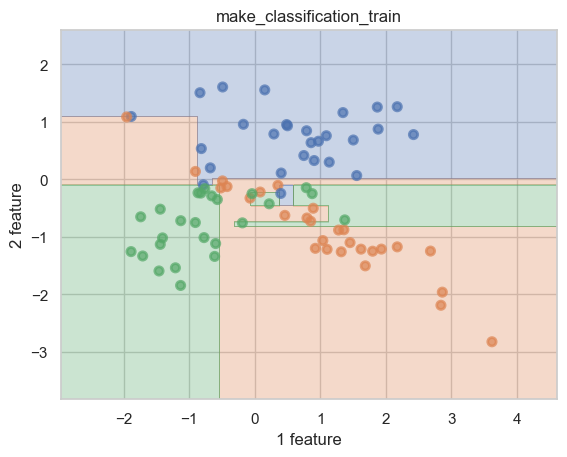

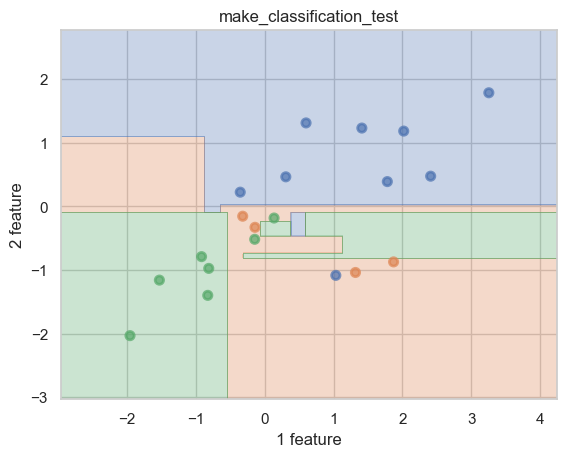

Train accuracy is 1.0
Test accuracy is 0.85


In [9]:
for split, name in zip(splits, ["make_circles", "make_moons", "make_classification"]):
    X_train, X_test, y_train, y_test = split

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X_train, y_train, name + "_train")
    plot_surface(clf, X_test, y_test, name + "_test")
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    train_acc = accuracy_score(pred_train, y_train)
    test_acc = accuracy_score(pred_test, y_test)
    print(f"Train accuracy is {train_acc}")
    print(f"Test accuracy is {test_acc}")


__Ответ:__
Ну переобучились, конечно, но я не сказал бы, что прям очень сильно. У последних двух даже аккураси ничего такой на тесте, у первого похуже. У всех деревьев есть характерные тонкие полоски и странные узоры, которые свидетельствуют о подгоне под обучающую выборку.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

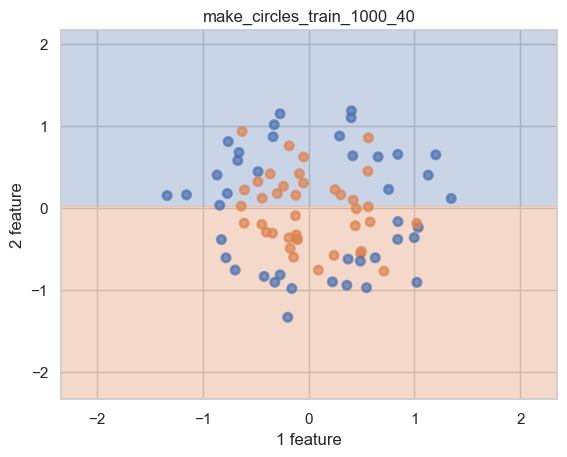

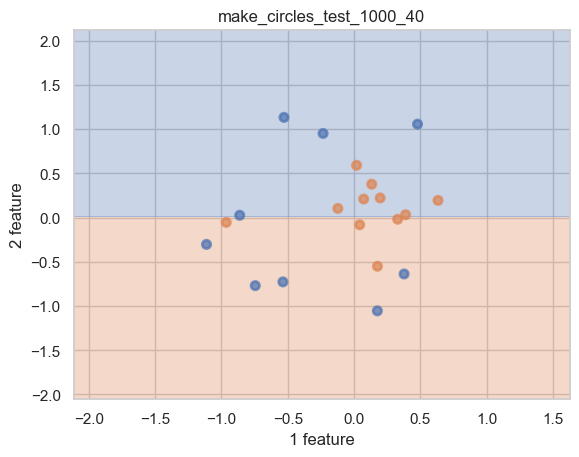

Train accuracy is 0.5375
Test accuracy is 0.4


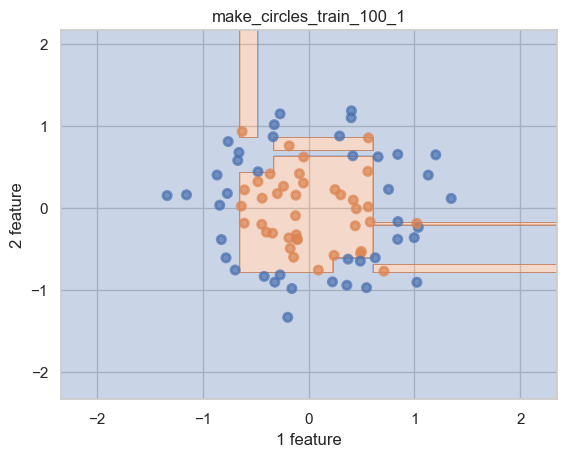

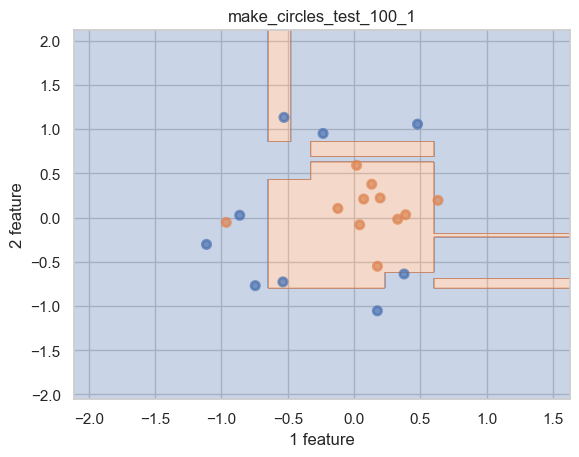

Train accuracy is 1.0
Test accuracy is 0.8


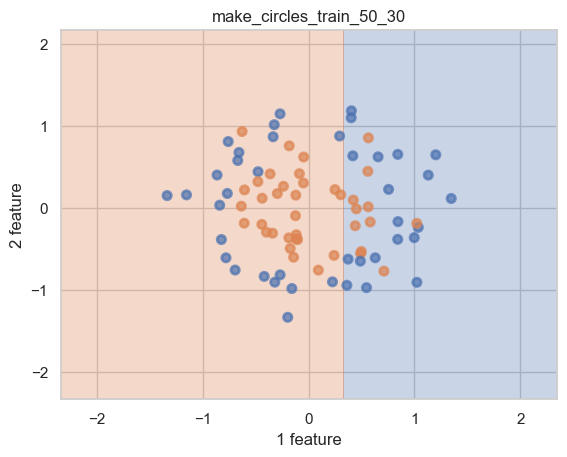

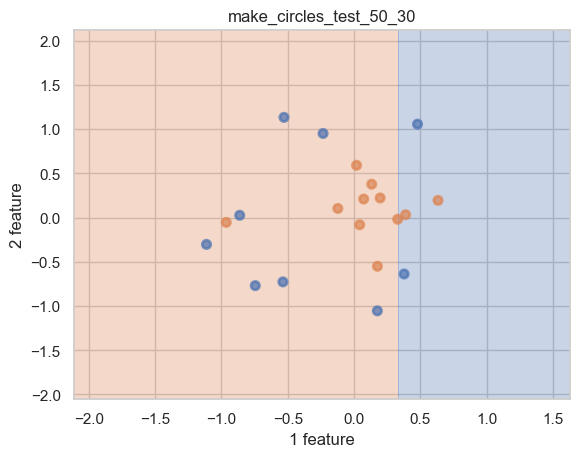

Train accuracy is 0.5875
Test accuracy is 0.55


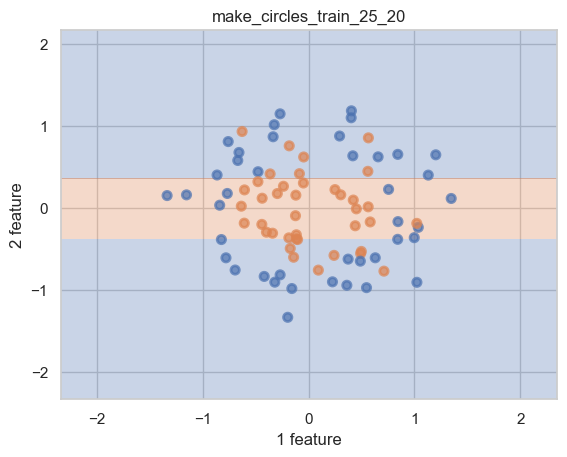

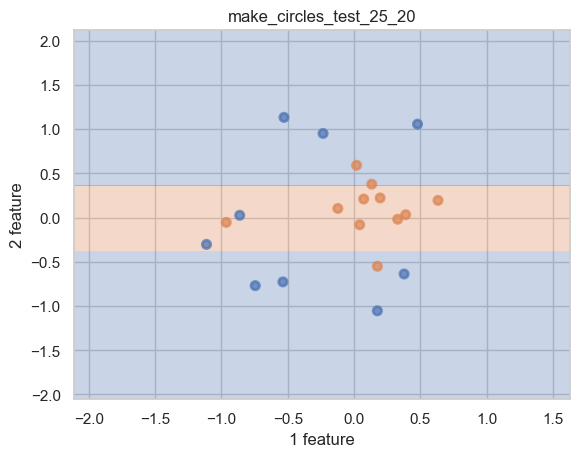

Train accuracy is 0.7
Test accuracy is 0.75


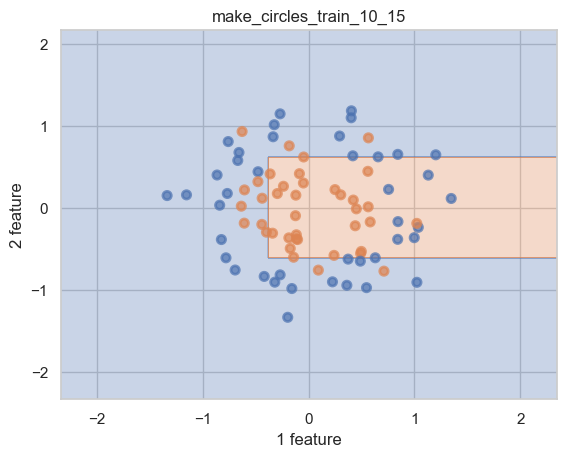

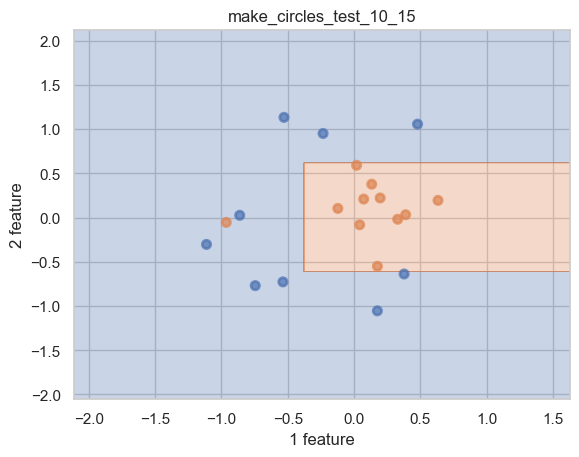

Train accuracy is 0.7625
Test accuracy is 0.95


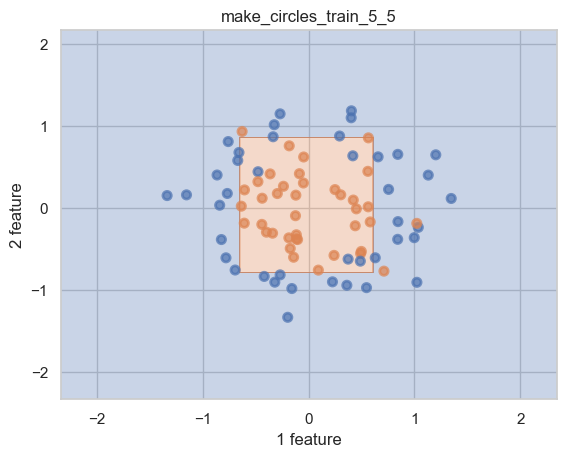

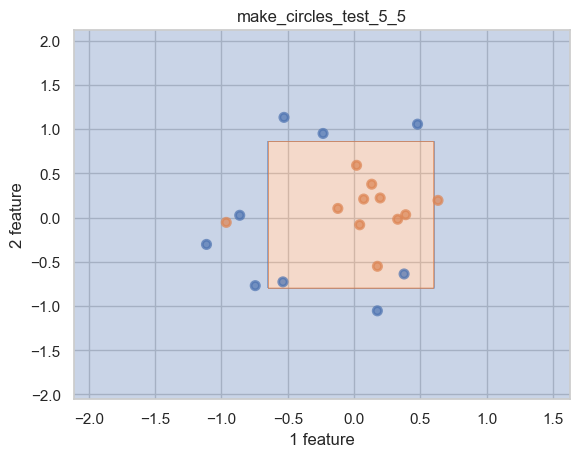

Train accuracy is 0.9125
Test accuracy is 0.8


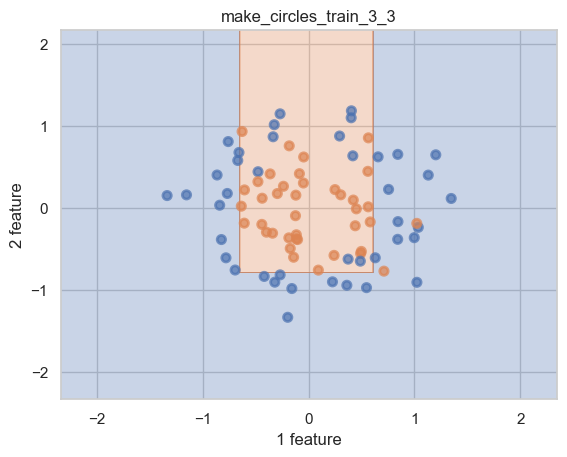

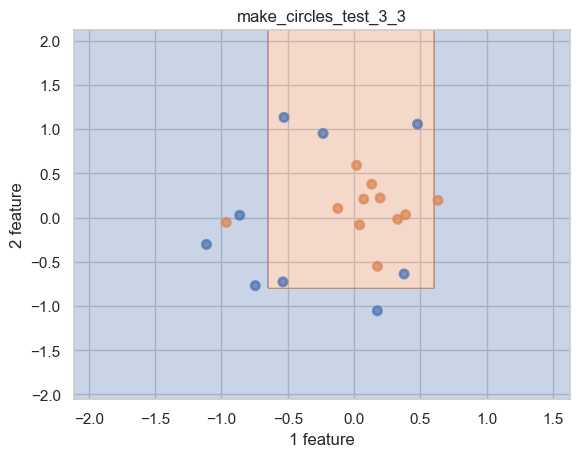

Train accuracy is 0.85
Test accuracy is 0.65


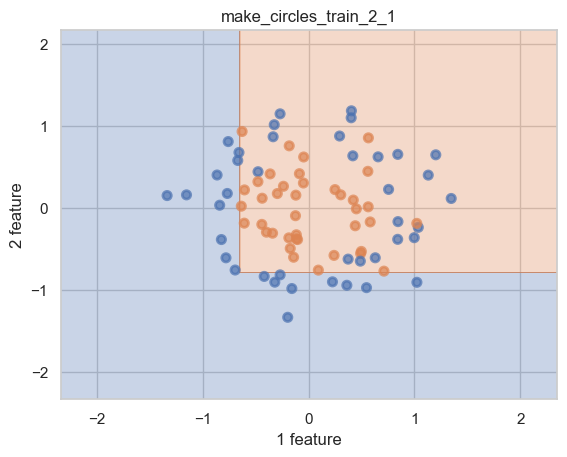

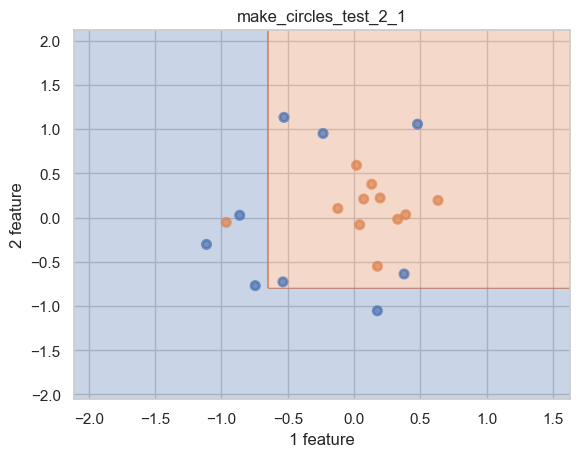

Train accuracy is 0.7375
Test accuracy is 0.7


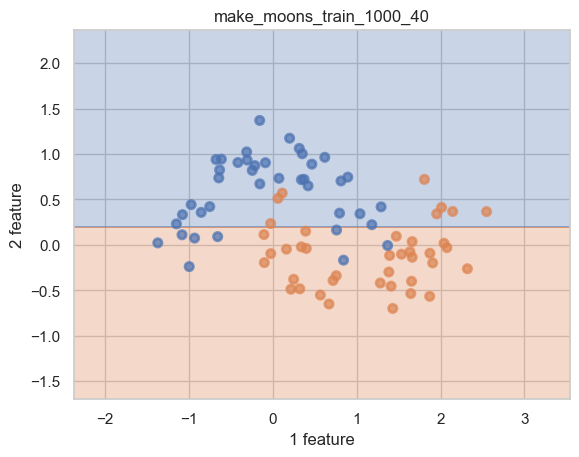

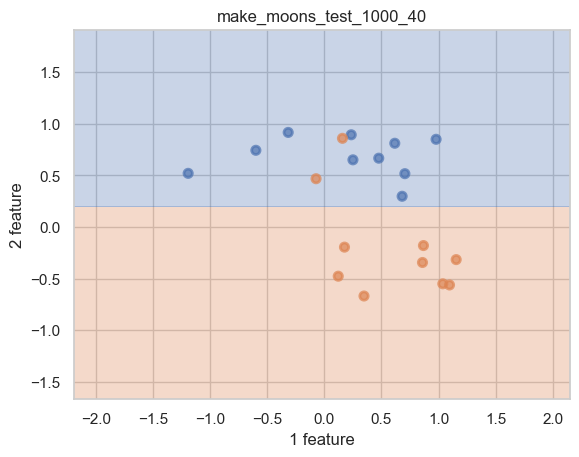

Train accuracy is 0.8
Test accuracy is 0.9


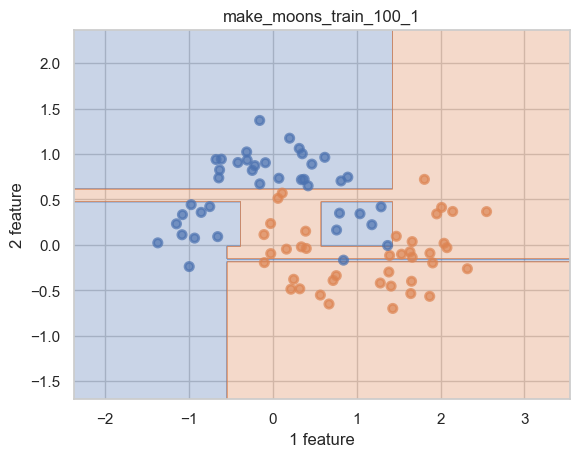

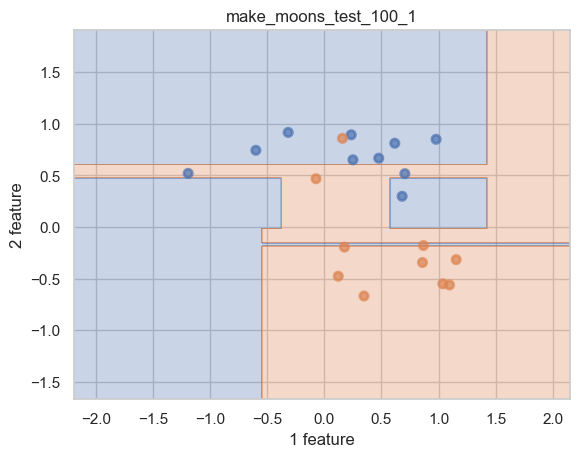

Train accuracy is 1.0
Test accuracy is 0.8


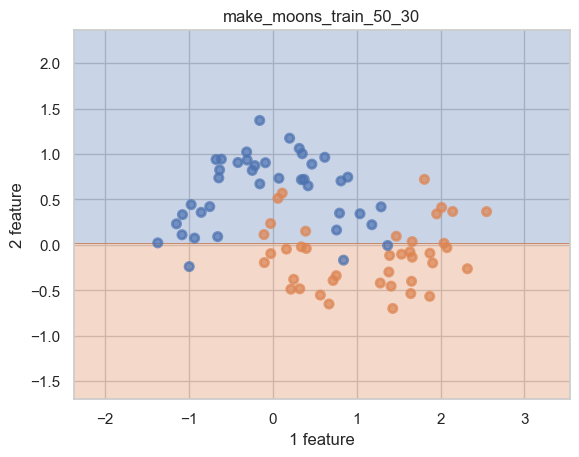

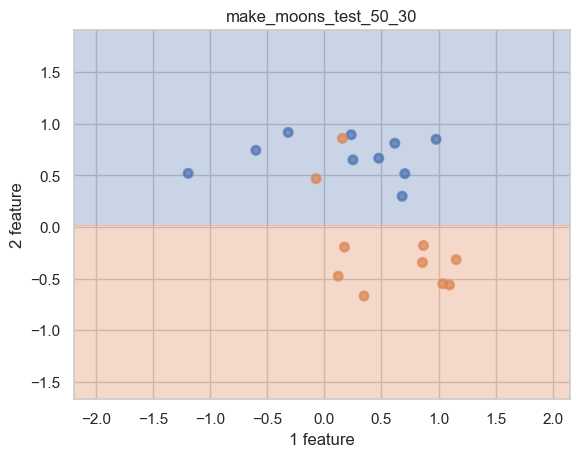

Train accuracy is 0.8125
Test accuracy is 0.9


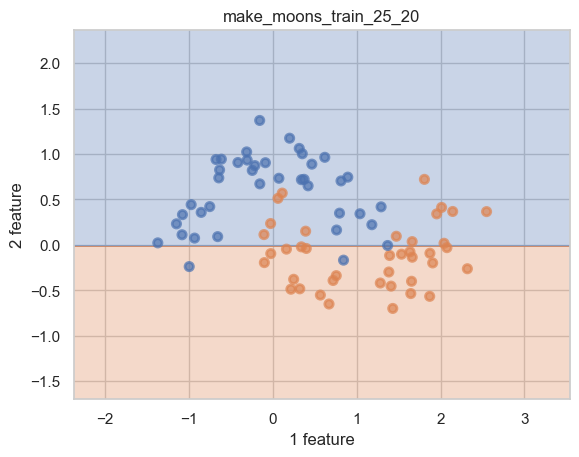

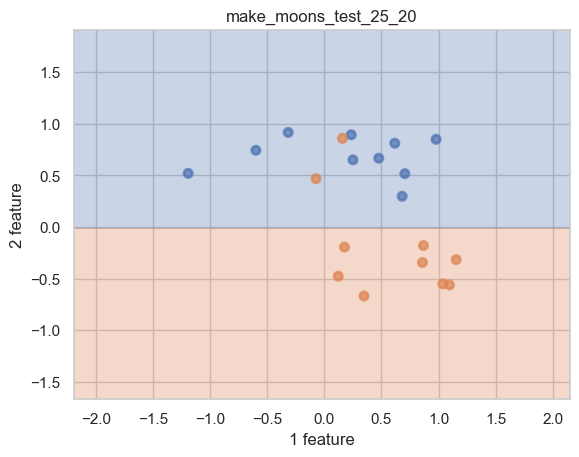

Train accuracy is 0.8125
Test accuracy is 0.9


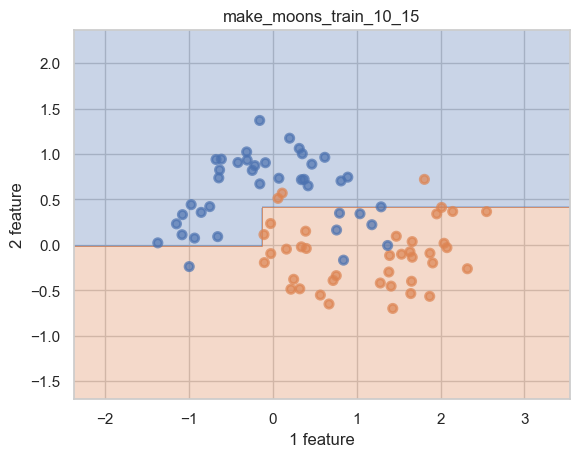

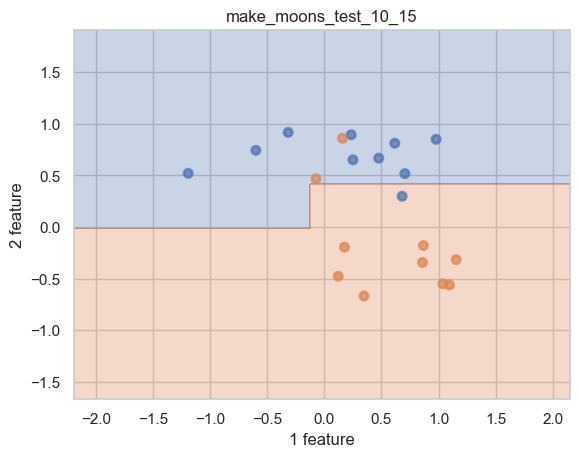

Train accuracy is 0.875
Test accuracy is 0.85


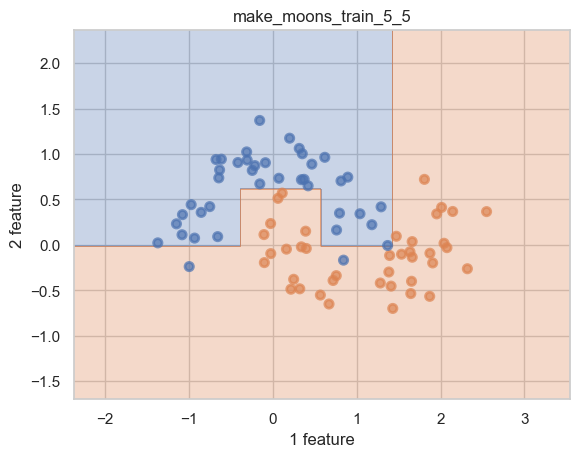

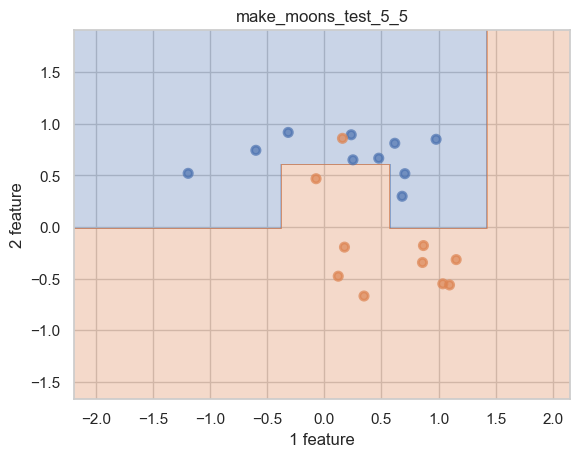

Train accuracy is 0.975
Test accuracy is 0.95


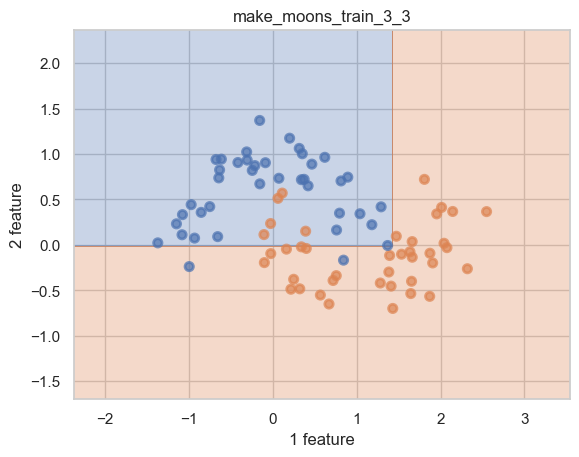

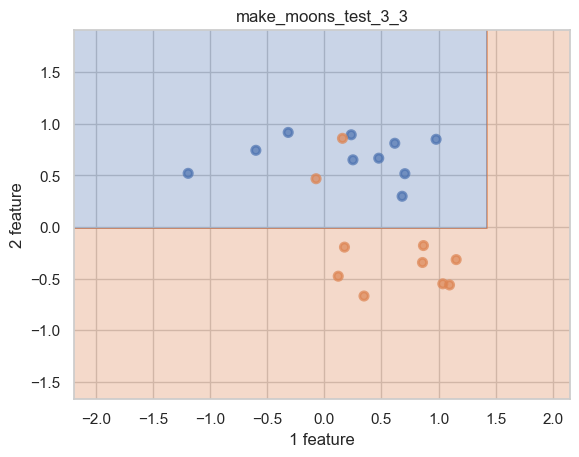

Train accuracy is 0.9125
Test accuracy is 0.9


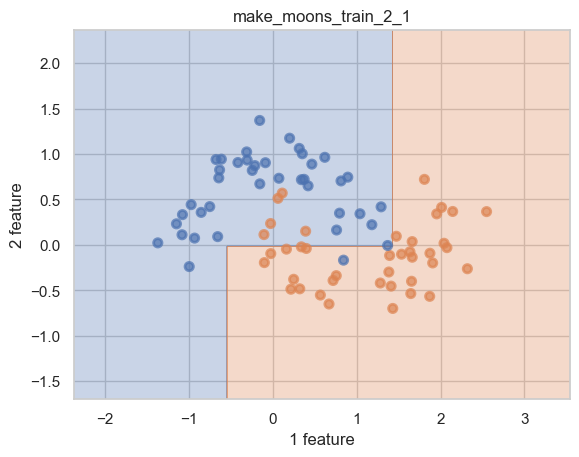

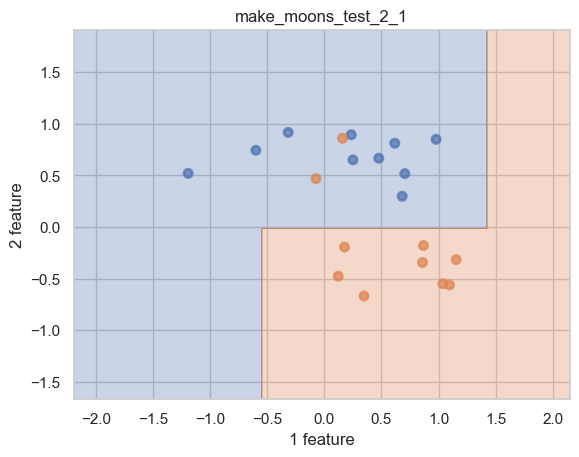

Train accuracy is 0.925
Test accuracy is 0.9


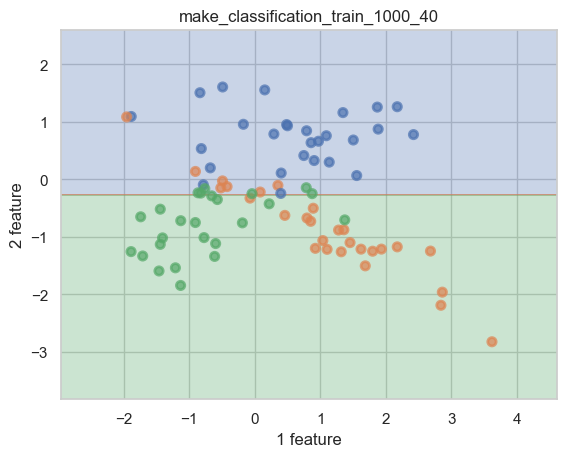

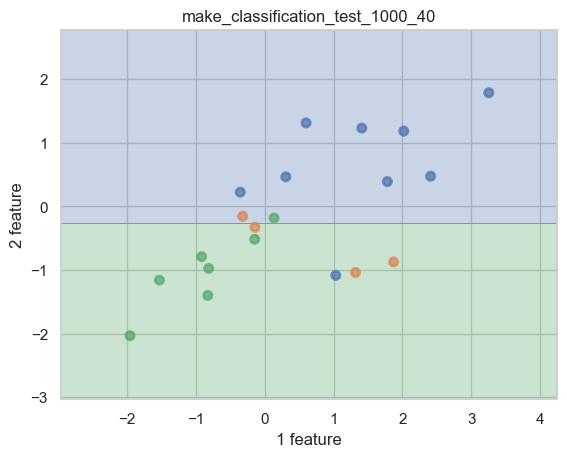

Train accuracy is 0.6
Test accuracy is 0.55


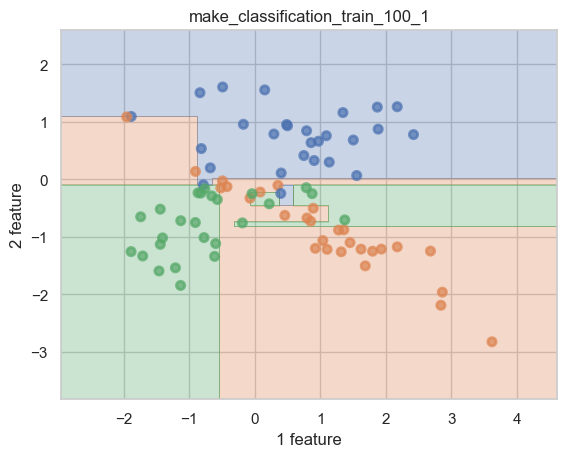

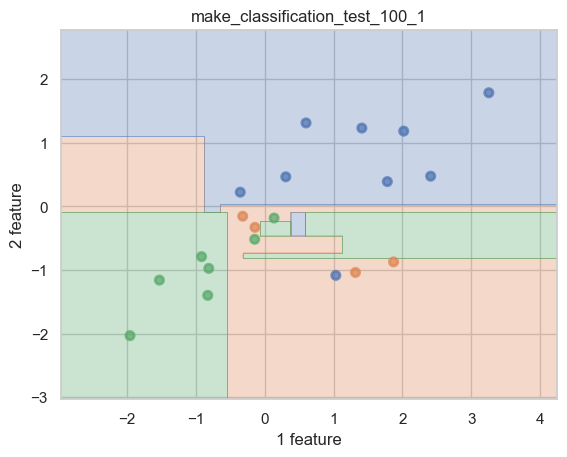

Train accuracy is 1.0
Test accuracy is 0.85


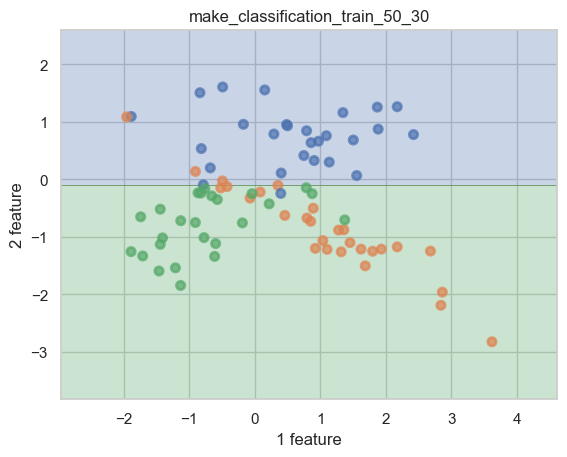

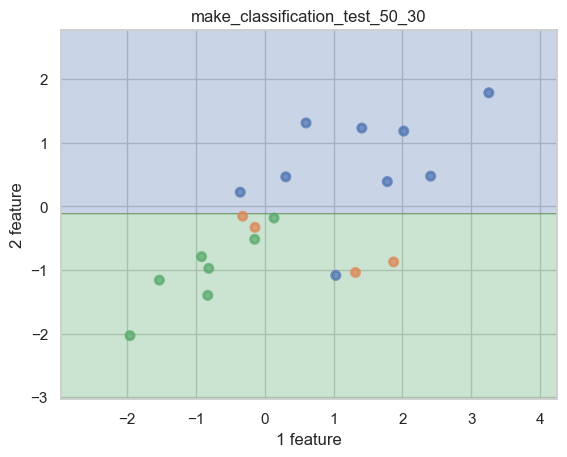

Train accuracy is 0.6375
Test accuracy is 0.75


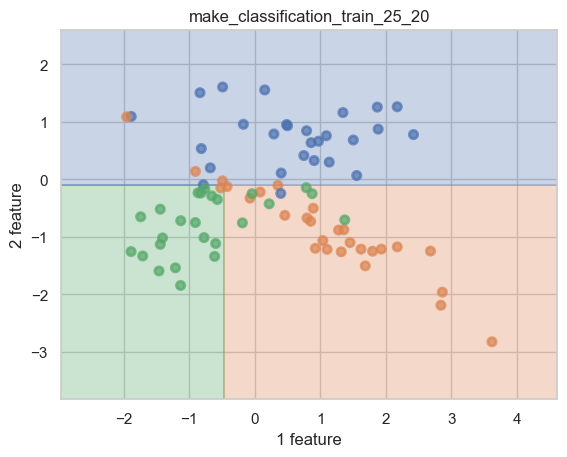

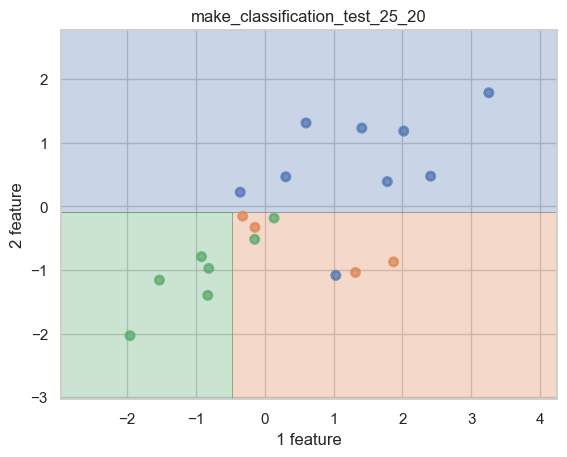

Train accuracy is 0.8625
Test accuracy is 0.85


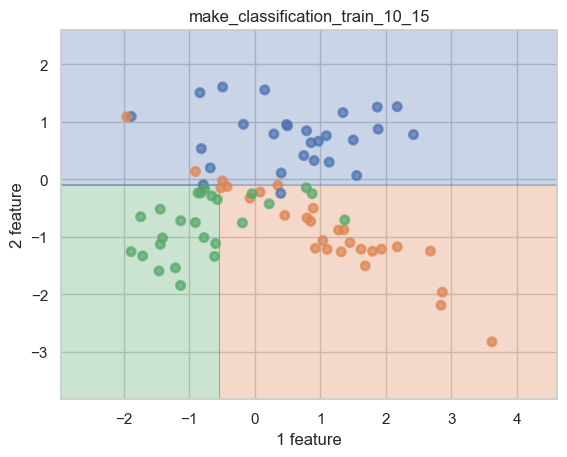

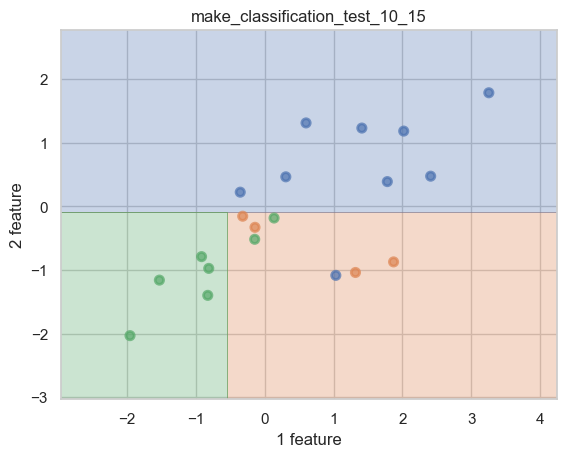

Train accuracy is 0.875
Test accuracy is 0.85


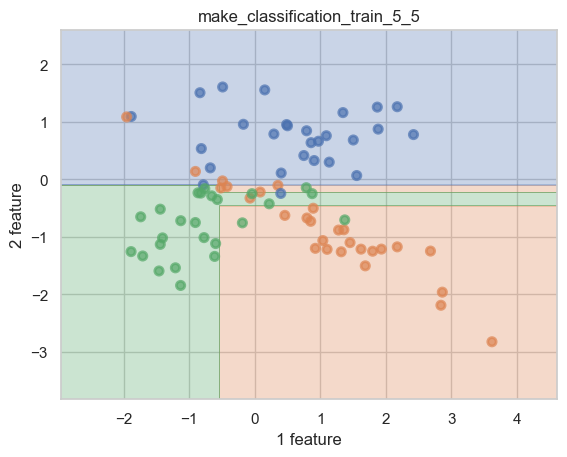

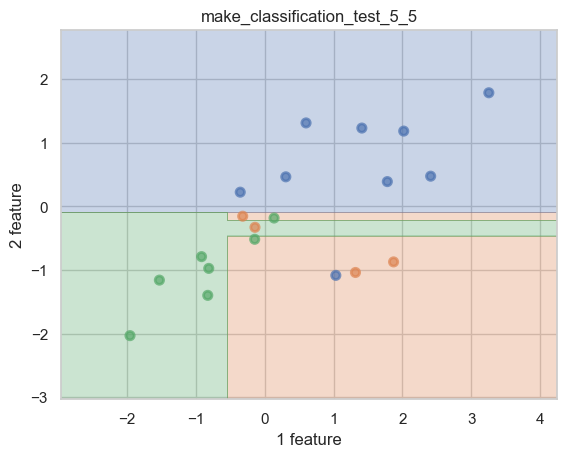

Train accuracy is 0.9
Test accuracy is 0.8


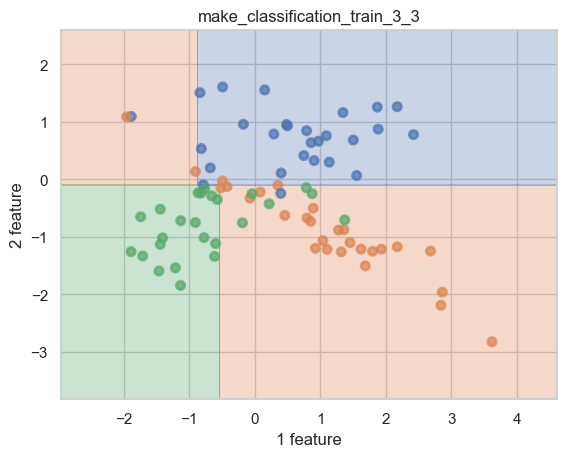

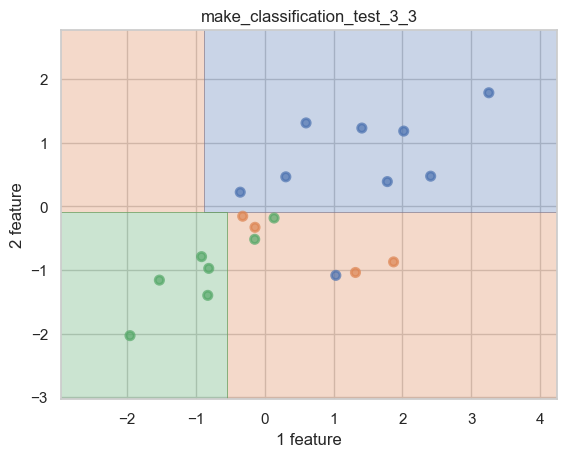

Train accuracy is 0.8875
Test accuracy is 0.85


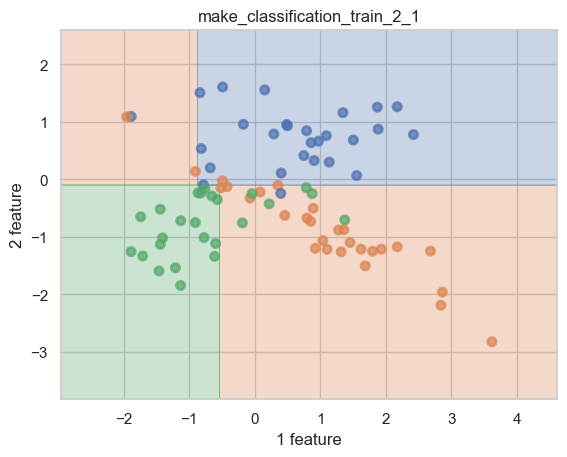

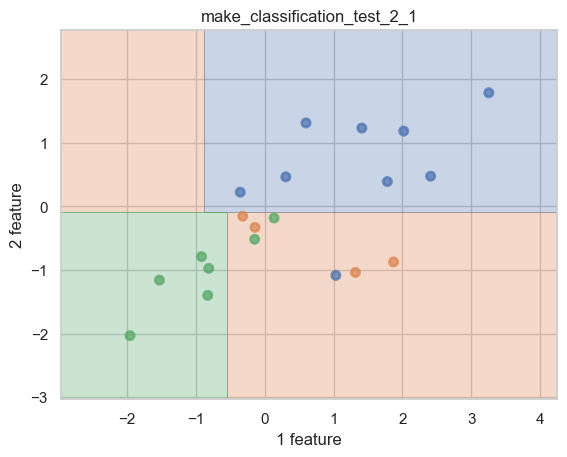

Train accuracy is 0.8875
Test accuracy is 0.85


In [12]:
min_samples = [40, 1, 30, 20, 15, 5, 3, 1]
max_depths = [1000, 100, 50, 25, 10, 5, 3, 2]

for split, name in zip(splits, ["make_circles", "make_moons", "make_classification"]):
    X_train, X_test, y_train, y_test = split

    for max_depth, min_sample in zip(max_depths, min_samples):
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_sample)
        clf.fit(X_train, y_train)
        plot_surface(clf, X_train, y_train, name + "_train" + "_" + str(max_depth) + "_" + str(min_sample))
        plot_surface(clf, X_test, y_test, name + "_test" + "_" + str(max_depth) + "_" + str(min_sample))
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)
        train_acc = accuracy_score(pred_train, y_train)
        test_acc = accuracy_score(pred_test, y_test)
        print(f"Train accuracy is {train_acc}")
        print(f"Test accuracy is {test_acc}")


__Ответ:__
Видим, что поверхности меняются характерным образом: при ограничении глубины пропадают характерные полоски, потому что дерево вынуждено меньше вопросов задавать объекту и поэтому прямоугольники становятся больше. При ограничении числа объектов в листе тоже пропадают эти полоски, ведь дерево вынуждено в лист много брать объектов. Таким образом можно бороться с переобучением, и аккураси на тесте подрастает, это видно. На разных датасетах конечно немного по-разному, ведь объекты на плоскости расположены иначе, в каком-то случае глубины 2 хватаем, где-то топология более сложная и поэтому нужно чуть больше глубины дать. Например, в случае make_circles там можно отделить внутренний круг квадратом и уже будет ничего, а в остальных может быть не так все просто

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [3]:
students_df = pd.read_csv('students.csv')
students_df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [4]:
from hw5code import find_best_split

results = []
target = students_df.loc[:, "UNS"].to_numpy()
for column in students_df.loc[:, "STG":"PEG"]:
    feature = students_df.loc[:, column].to_numpy()
    thresholds, ginis, _, _ = find_best_split(feature, target)
    results.append((thresholds, ginis))



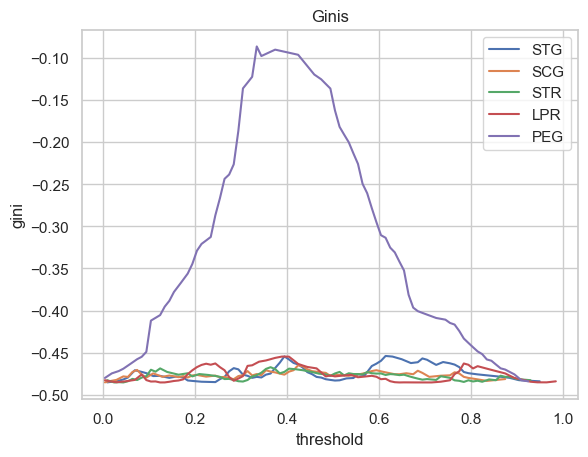

In [5]:
for res, feature in zip(results, students_df.columns):
    plt.plot(res[0], res[1], label=feature)

plt.xlabel("threshold")
plt.ylabel("gini")
plt.title("Ginis")
plt.legend()
plt.show()


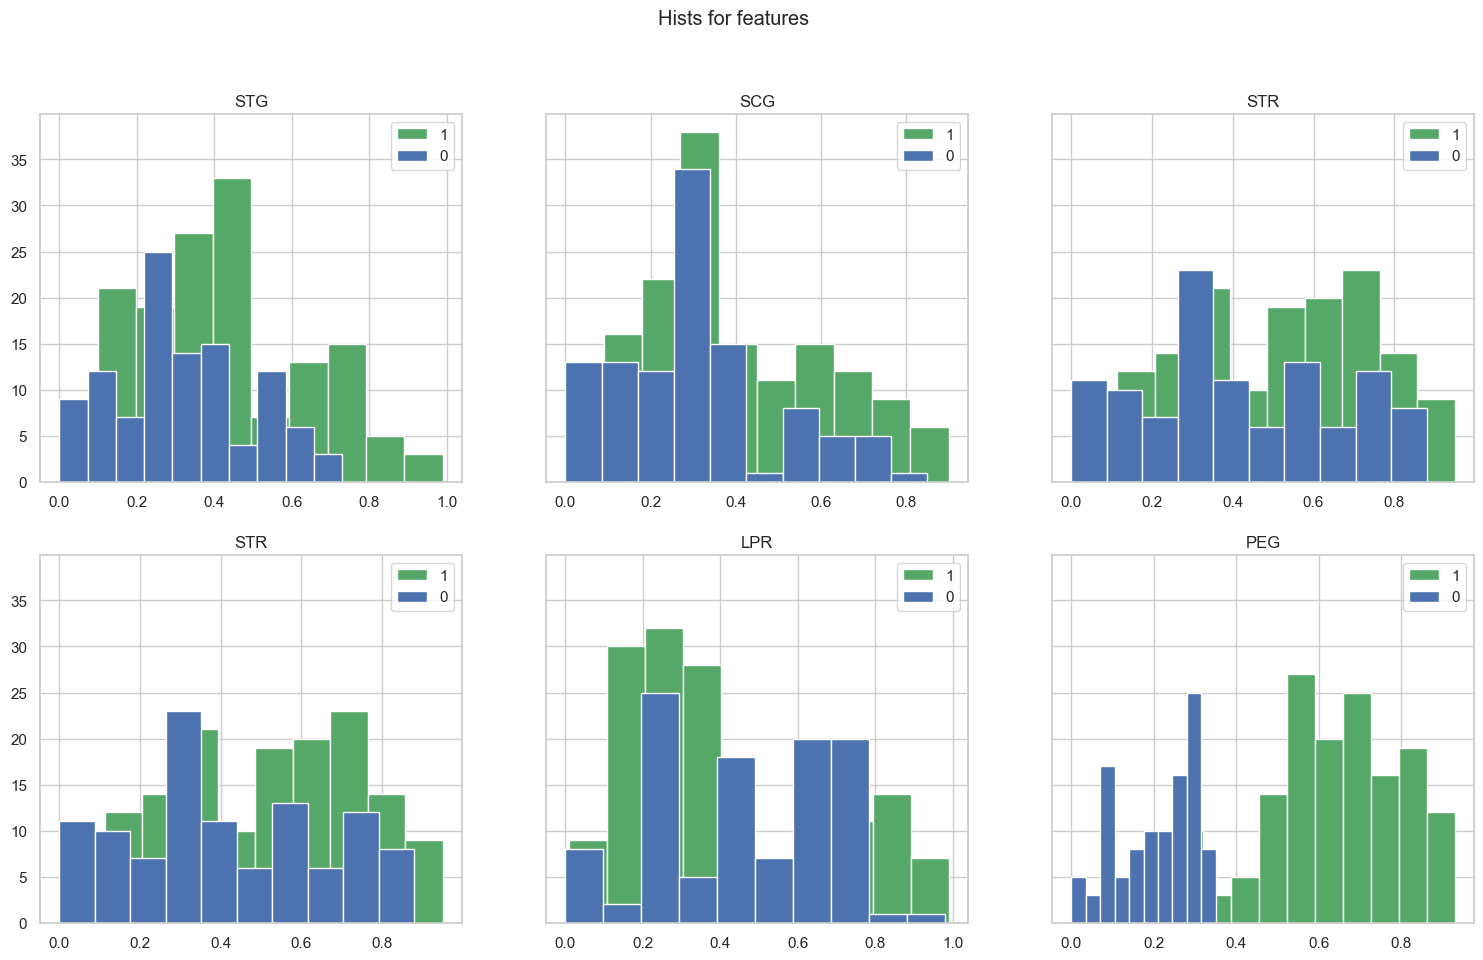

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(9, 3), sharey=True)
fig.set_size_inches(18.5, 10.5)
features = ["STG",	"SCG",	"STR",	"LPR",	"PEG"]
for i in range(2):
    for j in range(3):
            
        axs[i][j].hist(students_df[students_df["UNS"] == 1][features[i*2 + j]], label="1", facecolor='g')
        axs[i][j].hist(students_df[students_df["UNS"] == 0][features[i*2 + j]], label="0", facecolor='b')
        axs[i][j].title.set_text(features[i*2 + j])
        axs[i][j].legend()


fig.suptitle("Hists for features")
fig.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Очевидно, что по PEG, так как у него критерий джини самый большой достижим. Да, ссогласуется, у нас получается, что мощное разделение есть по признаку PEG у двух классов объектов, это хорошо видно из гистограммы. 
Иделально будет разделяться, если критерий джини близок к нулю и у линии четко выражен глоабльный максимум (он 1 в идеале должен быть), тогда у нас все хорошо разделится. Если у нас критерий джини далеко от нуля и линия испитывает флуктуации всякие разные, из-за которых сложно понять, где там максимум, то будет не очень хорошее разделение. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [2]:
data = pd.read_csv("/Users/ivanbondyrev/Downloads/agaricus-lepiota.data", sep=",")
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)

In [5]:
from hw5code import DecisionTree

tree = DecisionTree(["categorical"]*22)

train, test = train_test_split(data, test_size=0.5)

In [6]:
tree.fit(train.loc[:, 'x':].to_numpy(), train.loc[:, "p"].to_numpy())

In [7]:
y_pred = tree.predict(test.loc[:, 'x':].to_numpy())

In [8]:
from sklearn.metrics import accuracy_score
res = accuracy_score(y_pred, test.loc[:, "p"].to_numpy())

print(f"Accuracy is {res}")

Accuracy is 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [9]:
data_mushrooms = data
data_tic_tac = pd.read_csv("/Users/ivanbondyrev/Downloads/tic-tac-toe.data", sep=",")
data_cars = pd.read_csv("/Users/ivanbondyrev/Downloads/car.data", sep=",")
data_nursery = pd.read_csv("/Users/ivanbondyrev/Downloads/nursery.data", sep=",")

In [10]:
data_mushrooms_X = data_mushrooms.loc[:, "x":]
data_mushrooms_Y = data_mushrooms.loc[:, "p"]

In [11]:
data_tic_tac = data_tic_tac.apply(LabelEncoder().fit_transform)
data_tic_tac_X = data_tic_tac.loc[:, "x":"o.3"]
data_tic_tac_Y = data_tic_tac.loc[:, "positive"]

In [12]:
d = {"unacc" : 0, "acc": 0, "good" : 1, "vgood" : 1}
data_cars.replace({"unacc" : d}, inplace=True)
data_cars = data_cars.apply(LabelEncoder().fit_transform)
data_cars_X = data_cars.loc[:, "vhigh" : "low"]
data_cars_Y = data_cars.loc[:, "unacc"]

In [13]:
d = {"not_recom" : 0, "recommend" : 0, "very_recom" : 1, "priority" : 1, "spec_prior" : 1}
data_nursery.replace({"recommend" : d}, inplace=True)
data_nursery = data_nursery.apply(LabelEncoder().fit_transform)
data_nursery_X = data_nursery.loc[:, "usual" : "recommended"]
data_nursery_Y = data_nursery.loc[:, "recommend"]

In [14]:
results = pd.DataFrame(columns=["MyTree all real", "MyTree all categorical", "MyTree all real + OHE", "SklearnTree"])
results

,MyTree all real,MyTree all categorical,MyTree all real + OHE,SklearnTree


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse=False
)

In [17]:
#mushrooms
from hw5code import DecisionTree
features_num = data_mushrooms_X.shape[1]
tree = DecisionTree(["real"] * features_num)
mushrooms_1res = np.mean(cross_val_score(tree, data_mushrooms_X.to_numpy(), data_mushrooms_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

tree = DecisionTree(["categorical"] * features_num)
mushrooms_2res = np.mean(cross_val_score(tree, data_mushrooms_X.to_numpy(), data_mushrooms_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

data_mushrooms_X_ohe = ohe.fit_transform(data_mushrooms_X)
features_num_ohe = data_mushrooms_X_ohe.shape[1]
tree = DecisionTree(["real"] * features_num_ohe)
mushrooms_3res = np.mean(cross_val_score(tree, data_mushrooms_X_ohe, data_mushrooms_Y.to_numpy(), scoring=make_scorer(accuracy_score)))


tree = DecisionTreeClassifier()
mushrooms_4res = np.mean(cross_val_score(tree, data_mushrooms_X, data_mushrooms_Y, scoring=make_scorer(accuracy_score)))
results.loc["mushrooms"] = [mushrooms_1res,  mushrooms_2res, mushrooms_3res, mushrooms_4res]

In [18]:
#tic-tac-toe
features_num = data_tic_tac_X.shape[1]
tree = DecisionTree(["real"] * features_num)
res1 = np.mean(cross_val_score(tree, data_tic_tac_X.to_numpy(), data_tic_tac_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

tree = DecisionTree(["categorical"] * features_num)
res2 = np.mean(cross_val_score(tree, data_tic_tac_X.to_numpy(), data_tic_tac_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

data_tic_tac_X_ohe = ohe.fit_transform(data_tic_tac_X)
features_num_ohe = data_tic_tac_X_ohe.shape[1]
tree = DecisionTree(["real"] * features_num_ohe)
res3 = np.mean(cross_val_score(tree, data_tic_tac_X_ohe, data_tic_tac_Y.to_numpy(), scoring=make_scorer(accuracy_score)))


tree = DecisionTreeClassifier()
res4 = np.mean(cross_val_score(tree, data_tic_tac_X, data_tic_tac_Y, scoring=make_scorer(accuracy_score)))
results.loc["tic-tac-toe"] = [res1, res2, res3, res4]

In [19]:
#cars
features_num = data_cars_X.shape[1]
tree = DecisionTree(["real"] * features_num)
res1 = np.mean(cross_val_score(tree, data_cars_X.to_numpy(), data_cars_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

tree = DecisionTree(["categorical"] * features_num)
res2 = np.mean(cross_val_score(tree, data_cars_X.to_numpy(), data_cars_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

data_cars_X_ohe = ohe.fit_transform(data_cars_X)
features_num_ohe = data_cars_X_ohe.shape[1]
tree = DecisionTree(["real"] * features_num_ohe)
res3 = np.mean(cross_val_score(tree, data_cars_X_ohe, data_cars_Y.to_numpy(), scoring=make_scorer(accuracy_score)))


tree = DecisionTreeClassifier()
res4 = np.mean(cross_val_score(tree, data_cars_X, data_cars_Y, scoring=make_scorer(accuracy_score)))
results.loc["cars"] = [res1, res2, res3, res4]

In [20]:
#nursery
features_num = data_nursery_X.shape[1]
tree = DecisionTree(["real"] * features_num)
res1 = np.mean(cross_val_score(tree, data_nursery_X.to_numpy(), data_nursery_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

tree = DecisionTree(["categorical"] * features_num)
res2 = np.mean(cross_val_score(tree, data_nursery_X.to_numpy(), data_nursery_Y.to_numpy(), scoring=make_scorer(accuracy_score)))

data_nursery_X_ohe = ohe.fit_transform(data_nursery_X)
features_num_ohe = data_nursery_X_ohe.shape[1]
tree = DecisionTree(["real"] * features_num_ohe)
res3 = np.mean(cross_val_score(tree, data_nursery_X_ohe, data_nursery_Y.to_numpy(), scoring=make_scorer(accuracy_score)))


tree = DecisionTreeClassifier()
res4 = np.mean(cross_val_score(tree, data_nursery_X, data_nursery_Y, scoring=make_scorer(accuracy_score)))
results.loc["nursery"] = [res1, res2, res3, res4]

In [21]:
results

,MyTree all real,MyTree all categorical,MyTree all real + OHE,SklearnTree
mushrooms,0.996798,0.988180,0.994335,0.925261
tic-tac-toe,0.442256,0.527585,0.528632,0.696062
cars,0.922319,0.922319,0.895091,0.894555
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [25]:
from hw5code import find_best_split
def draw_ginis(df, target, name):
    results = []
    for column in df:
        feature = df.loc[:, column].to_numpy()
        thresholds, ginis, _, _ = find_best_split(feature, target)
        results.append((thresholds, ginis))

    for res, feature in zip(results, df.columns):
        plt.plot(res[0], res[1], label=feature)

    plt.xlabel("threshold")
    plt.ylabel("gini")
    plt.title("Ginis " + name)
    plt.legend()
    plt.show()


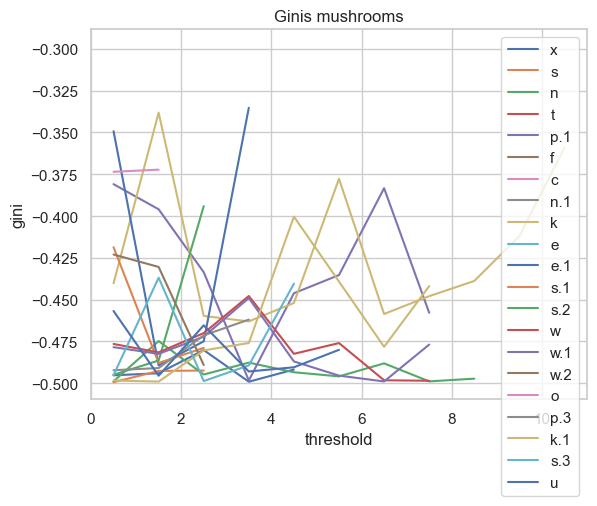

In [26]:
draw_ginis(data_mushrooms_X.drop(["p.2"], axis=1), data_mushrooms_Y, "mushrooms")

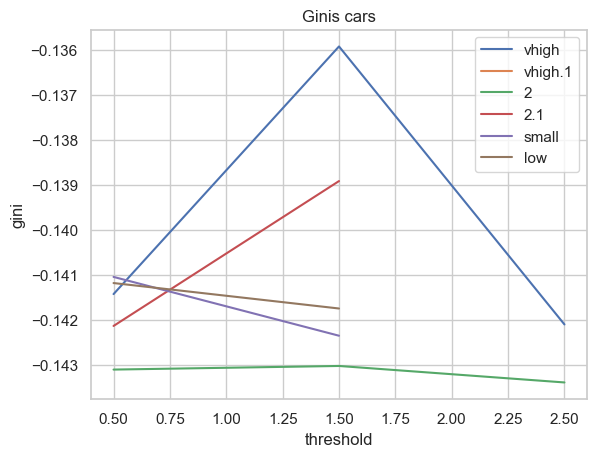

In [28]:
draw_ginis(data_cars_X, data_cars_Y, "cars")

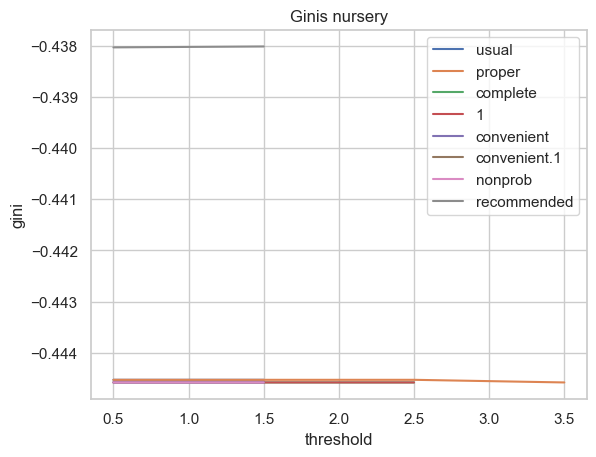

In [29]:
draw_ginis(data_nursery_X, data_nursery_Y, "nursery")

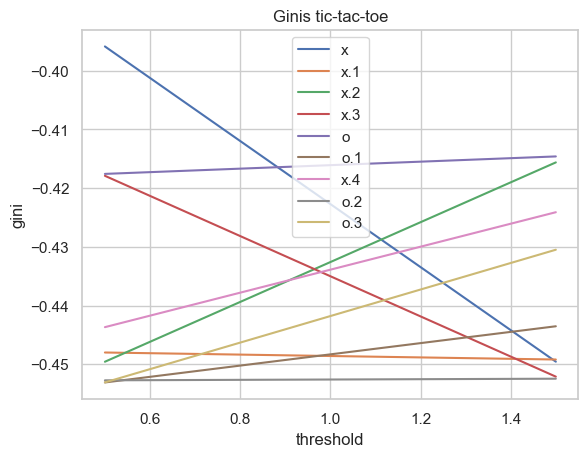

In [32]:
draw_ginis(data_tic_tac_X, data_tic_tac_Y, "tic-tac-toe")

Ну короче виднно, что у нас на тик-таке очень плохие джини поэтому ничего нормально и не получается, а остальных все +- ок, опэтому все +- хорошо. Случайности нет, деревья детерминированы, так что непонятно, что хотят. Разве что в cv, но и что что она там есть


Посылки:
https://contest.yandex.ru/contest/43413/problems/A/
https://contest.yandex.ru/contest/43413/problems/B/

Ник: iyubondyrev@edu.hse.ru

Вставьте что угодно, описывающее ваши впечатления от этого задания:
Я работаю только за баллы, за этот вопрос 0 баллов, значит ничего не смогу вставаить